In [29]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import kerastuner as kt
from sklearn.model_selection import train_test_split
import seaborn as sns


    
# for activation functions check https://keras.io/api/layers/activations/
def create_model2(my_learning_rate,momentum,layers,my_metrics,my_act_function = "softmax"):
    model = tf.keras.models.Sequential()
    #model.add(my_feature_layer)

    for layer in layers:
        model.add(tf.keras.layers.Dense(units = layer, activation = my_act_function))
    model.add(tf.keras.layers.Dense(units=2,name='Output', activation = 'relu'))                             
    model.compile(optimizer=tf.keras.optimizers.SGD(lr=my_learning_rate,momentum=momentum),                                       
                loss=tf.keras.losses.MeanAbsoluteError(),
                metrics=my_metrics)
    return model


def train_model(model,x_data, y_data, epochs, label_name,
                batch_size=None,shuffle=True):
    #features = {name:np.array(value) for name, value in dataset.items()}
    history = model.fit(x=x_data, y=y_data, batch_size=batch_size,
                      epochs=epochs, shuffle=shuffle,validation_split=0.2)
  
    epochs = history.epoch
    hist = pd.DataFrame(history.history)
    return epochs, hist
    
    
#returns dataframe
def test_model(model,x_data, y_data ,label_name):
    evaluation=model.evaluate(x = x_data, y = y_data, batch_size=batch_size)
    predicted = model.predict(x_data)
    df_test=pd.DataFrame(y_data,columns=[label_name])
   # print(predicted)
    df_predict=pd.DataFrame(predicted,columns=[label+"_pred" for label in label_name])
    return pd.concat([df_test,df_predict], axis=1)



In [2]:

all_labels_features=["delta","lambda","all_maxima","Intensity","no_of_max"]
all_data=pd.read_csv("../../generated_Data/all_param_4_values_complete.csv")
df_feature_labels=all_data[all_labels_features]

max_no_of_peak_list=max(all_data["no_of_max"])
print(max_no_of_peak_list)
df_feature_labels.head(50)

7


,delta,lambda,all_maxima,Intensity,no_of_max
0,0.6000,0.1000,[0.466 0.54 0.612 0.67 0.742],[104.475076 104.507572 87.7231385 58.12209...,5
1,0.6000,0.2333,[0.51 0.584 0.65 0.712 0.778],[121.232278 120.055307 85.8745546 56.17655...,5
2,0.6000,0.2333,[0.482 0.556 0.628 0.686 0.756],[101.883081 101.900808 85.5862194 56.79913...,5
3,0.5333,0.2333,[0.418 0.492 0.564 0.622 0.692],[101.197996 101.175315 85.035938 56.43656...,5
4,0.5333,0.1000,[0.4 0.474 0.546 0.604 0.676],[104.345828 104.372914 87.6137903 58.09441...,5
5,0.4667,0.3667,[0.38 0.454 0.526 0.584 0.656],[94.84709 94.8829634 79.6727722 52.8243582 3...,5
6,0.5333,0.3667,[0.442 0.514 0.588 0.646 0.718],[96.1280182 96.1175351 80.8515783 53.6785795 3...,5
7,0.5333,0.5000,[0.468 0.542 0.614 0.672 0.744 0.816],[91.252105 91.2117743 76.572234 50.7450912 3...,6
8,0.4667,0.5000,[0.41 0.484 0.556 0.614 0.686],[89.1194072 88.9942592 74.6345554 49.4436402 3...,5
9,0.4000,0.1000,[0.268 0.342 0.414 0.472 0.544],[103.827555 103.893591 87.1849663 57.82552...,5


In [3]:
#convert string lists into numpy arrays in dict

all_maxima_array=np.asarray([  np.asarray([x for x in row.replace("[","").replace("]","").replace("  "," ",5).replace(" ",";").split(";") if x!=""],dtype=np.float64)  for row in df_feature_labels["all_maxima"] ])

intensity_array=np.asarray([  np.asarray([x for x in row.replace("[","").replace("]","").replace("  "," ",5).replace(" ",";").split(";") if x!=""],dtype=np.float64) for row in df_feature_labels["Intensity"] ])

#pad all_maxima_array and intensity_array
all_maxima_array_padded=np.zeros((len(all_maxima_array),max_no_of_peak_list))
intensity_array_padded=np.zeros((len(intensity_array),max_no_of_peak_list))

for i in range(len(all_maxima_array)):
    for j in range(len(all_maxima_array[i])):
        all_maxima_array_padded[i][j]=all_maxima_array[i][j]
        intensity_array_padded[i][j]=intensity_array[i][j]



no_of_max_array=df_feature_labels["no_of_max"].to_numpy()
delta_array=df_feature_labels["delta"].to_numpy()

lambda_array=df_feature_labels["lambda"].to_numpy()


<ipython-input-3-d26fb703051c>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  all_maxima_array=np.asarray([  np.asarray([x for x in row.replace("[","").replace("]","").replace("  "," ",5).replace(" ",";").split(";") if x!=""],dtype=np.float64)  for row in df_feature_labels["all_maxima"] ])
<ipython-input-3-d26fb703051c>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  intensity_array=np.asarray([  np.asarray([x for x in row.replace("[","").replace("]","").replace("  "," ",5).replace(" ",";").split(";") if x!=""],dtype=np.float64) for row in df_feat

In [4]:
concat_label=np.zeros((len(delta_array),2))
for i in range(len(delta_array)):
    concat_label[i][0]=delta_array[i]
    concat_label[i][1]=lambda_array[i]


#concat_feature=np.concatenate((all_maxima_array_padded,intensity_array_padded),axis=1)
concat_feature=no_of_max_array

x_train, x_test,y_train,y_test = train_test_split( concat_feature, concat_label  ,test_size=0.20, random_state=42)


In [5]:
learning_rate = 1e-3
momentum=0.4
epochs = 120
batch_size = 200

#specify the classification threshold
classification_threshold = 0.15

# Establish the metrics the model will measure.
metric = [tf.keras.metrics.MeanAbsoluteError()]
layers=[16,256,1024,64,16]


all_label_list=["delta","lambda"]

my_model= create_model2(learning_rate,momentum,layers,metric,my_act_function="relu")

#lambda_train, lambda_test
#delta_train, delta_test

epochs_run, hist = train_model(my_model,x_train, y_train, epochs, 
                          all_label_list, batch_size)


Epoch 1/120
210/210 [==============================] - 4s 15ms/step - loss: 0.2532 - mean_absolute_error: 0.2532 - val_loss: 0.1188 - val_mean_absolute_error: 0.1188
Epoch 2/120
210/210 [==============================] - 2s 9ms/step - loss: 0.1145 - mean_absolute_error: 0.1145 - val_loss: 0.1085 - val_mean_absolute_error: 0.1085
Epoch 3/120
210/210 [==============================] - 2s 8ms/step - loss: 0.1070 - mean_absolute_error: 0.1070 - val_loss: 0.1033 - val_mean_absolute_error: 0.1033
Epoch 4/120
210/210 [==============================] - 2s 9ms/step - loss: 0.1024 - mean_absolute_error: 0.1024 - val_loss: 0.1007 - val_mean_absolute_error: 0.1007
Epoch 5/120
210/210 [==============================] - 2s 7ms/step - loss: 0.1006 - mean_absolute_error: 0.1006 - val_loss: 0.0994 - val_mean_absolute_error: 0.0994
Epoch 6/120
210/210 [==============================] - 2s 8ms/step - loss: 0.0991 - mean_absolute_error: 0.0991 - val_loss: 0.0988 - val_mean_absolute_error: 0.0988
Epoch 7/1

210/210 [==============================] - 6s 27ms/step - loss: 0.0961 - mean_absolute_error: 0.0961 - val_loss: 0.0963 - val_mean_absolute_error: 0.0963
Epoch 51/120
210/210 [==============================] - 6s 31ms/step - loss: 0.0963 - mean_absolute_error: 0.0963 - val_loss: 0.0962 - val_mean_absolute_error: 0.0962
Epoch 52/120
210/210 [==============================] - 5s 24ms/step - loss: 0.0966 - mean_absolute_error: 0.0966 - val_loss: 0.0962 - val_mean_absolute_error: 0.0962
Epoch 53/120
210/210 [==============================] - 5s 26ms/step - loss: 0.0962 - mean_absolute_error: 0.0962 - val_loss: 0.0962 - val_mean_absolute_error: 0.0962
Epoch 54/120
210/210 [==============================] - 6s 30ms/step - loss: 0.0960 - mean_absolute_error: 0.0960 - val_loss: 0.0962 - val_mean_absolute_error: 0.0962
Epoch 55/120
210/210 [==============================] - 4s 19ms/step - loss: 0.0963 - mean_absolute_error: 0.0963 - val_loss: 0.0962 - val_mean_absolute_error: 0.0962
Epoch 56/12

210/210 [==============================] - 4s 21ms/step - loss: 0.0961 - mean_absolute_error: 0.0961 - val_loss: 0.0962 - val_mean_absolute_error: 0.0962
Epoch 100/120
210/210 [==============================] - 6s 26ms/step - loss: 0.0963 - mean_absolute_error: 0.0963 - val_loss: 0.0961 - val_mean_absolute_error: 0.0961
Epoch 101/120
210/210 [==============================] - 6s 31ms/step - loss: 0.0963 - mean_absolute_error: 0.0963 - val_loss: 0.0962 - val_mean_absolute_error: 0.0962
Epoch 102/120
210/210 [==============================] - 5s 22ms/step - loss: 0.0963 - mean_absolute_error: 0.0963 - val_loss: 0.0961 - val_mean_absolute_error: 0.0961
Epoch 103/120
210/210 [==============================] - 5s 24ms/step - loss: 0.0963 - mean_absolute_error: 0.0963 - val_loss: 0.0961 - val_mean_absolute_error: 0.0961
Epoch 104/120
210/210 [==============================] - 6s 29ms/step - loss: 0.0961 - mean_absolute_error: 0.0961 - val_loss: 0.0962 - val_mean_absolute_error: 0.0962
Epoch 

In [37]:

def plot_curve(epochs, hist, list_of_metrics,name, label_names, savename=None ):
    """Plot a curve of one or more classification metrics vs. epoch."""  
    plt.figure(figsize=(8,5))
    mf = 18
    plt.xlabel("Epoch "+name, fontsize=mf)
    plt.ylabel("mean absolute error", fontsize=mf)

    for m, label in zip(list_of_metrics, label_names):
        x = hist[m]
        plt.plot(epochs[1:], x[1:], label=m)
    plt.legend(fontsize=mf)
    if savename is not None:
        plt.savefig(savename+".eps", format="eps")


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


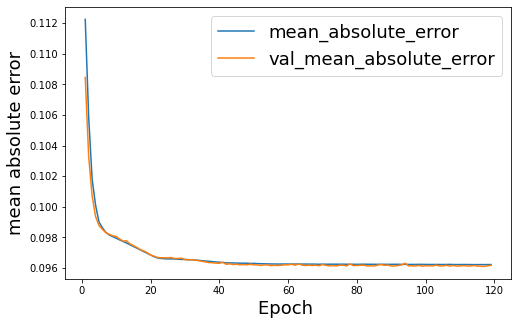

In [42]:
list_of_metrics_to_plot = ['mean_absolute_error',"val_mean_absolute_error"] 
label_names = ["training", "validation"]
plot_curve(epochs_run, hist, list_of_metrics_to_plot,"",label_names,savename = "delta_lambda_large_dataset_unsuccessful_epoch")

In [40]:
delta_test_result=test_model(my_model,x_test,y_test,all_label_list)


delta_test_result.round(3).head(10)

delta_test_result.round(3).to_csv("delta_lambda_large_dataset_unsuccessful.csv")

66/66 [==============================] - 0s 3ms/step - loss: 0.0971 - mean_absolute_error: 0.0971


In [84]:
from scipy.stats import norm

def histogramm(testing_df, name, max_range, bins_val, y_max=0, savename=None):
    df_columns = testing_df.columns
    data_delta = testing_df[df_columns[0]]-testing_df[df_columns[2]]
    data_lambda = testing_df[df_columns[1]]-testing_df[df_columns[3]]

    mu, std = norm.fit(data_lambda)

    plt.figure(figsize=(8,5))
    mf = 18

    plt.hist(data_delta, bins=bins_val, label="delta")
    plt.hist(data_lambda, bins=bins_val, label="lambda")

    if max_range is not None:
        plt.xlim(-max_range, max_range)
    if(y_max != 0):
        plt.ylim(0, y_max)

    plt.xlabel("Differenz", fontsize=mf)
   # plt.title(name+" mean = %.4f,  std = %.4f" % (mu, std),fontsize=mf)
    plt.legend(fontsize=14,loc=1)

    if savename is not None:
        savename=savename.replace(" ", "_")
        plt.savefig(savename+".eps", format="eps")
    plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


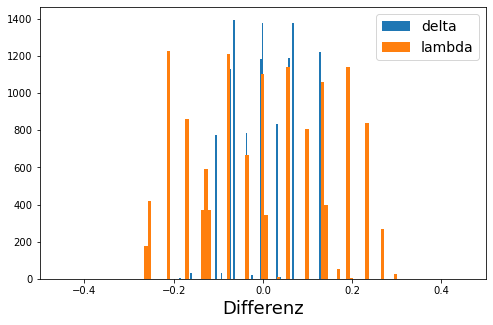

In [86]:
histogramm(delta_test_result,"$\Delta,\Lambda$", 0.5,80, savename="delta_lambda_large_dataset_unsuccessful_hist")

In [47]:
delta_test_result

,"(delta,)","(lambda,)",delta_pred,lambda_pred
0,0.4667,0.5000,0.466696,0.365296
1,0.6000,0.5000,0.473095,0.309190
2,0.6000,0.5000,0.466738,0.356819
3,0.4667,0.3667,0.466738,0.356819
4,0.5333,0.3667,0.466738,0.356819
...,...,...,...,...
13088,0.5333,0.3667,0.533508,0.230623
13089,0.6000,0.3667,0.503351,0.269716
13090,0.5333,0.2333,0.503351,0.269716
13091,0.4667,0.5000,0.503351,0.269716
